## **import libraries**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## **Load the dataset**

In [ ]:
df = pd.read_csv('C:\\Users\\vihan_mhb2hds\\OneDrive\\Documents\\GitHub\\AIML--PG-52\\DATA\\Online Retail.csv', encoding='latin-1')


#  **preprocessing technique**

# 7) Data Transformation

## 7.1 Data Type Conversion

In [ ]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert identifiers to string
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['CustomerID'] = df['CustomerID'].astype(str)


### Normalization (Min-Max Scaling)

##### Used when features have different scales. Brings values into a [0,1] range.

In [ ]:
###
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Example dataset
data = pd.DataFrame({
    'Age': [20, 25, 30, 35, 40],
    'Salary': [2000, 3000, 4000, 5000, 6000]
})

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

normalized_df = pd.DataFrame(data_normalized, columns=data.columns)
print(normalized_df)


    Age  Salary
0  0.00    0.00
1  0.25    0.25
2  0.50    0.50
3  0.75    0.75
4  1.00    1.00


### Standardization (Z-score Scaling)

##### Centers data around mean 0 with std deviation 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

standardized_df = pd.DataFrame(data_standardized, columns=data.columns)
print(standardized_df)


        Age    Salary
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


### Log Transformation

##### Helps reduce skewness and handle wide range of values.

In [ ]:
import numpy as np

data['Log_Salary'] = np.log(data['Salary'])
print(data)


   Age  Salary  Log_Salary
0   20    2000    7.600902
1   25    3000    8.006368
2   30    4000    8.294050
3   35    5000    8.517193
4   40    6000    8.699515


## Power Transformation

##### Handles skewed distributions better than log.

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
data_transformed = pt.fit_transform(data[['Salary']])

data['Salary_Transformed'] = data_transformed
print(data)


   Age  Salary  Log_Salary  Salary_Transformed
0   20    2000    7.600902           -1.472958
1   25    3000    8.006368           -0.669775
2   30    4000    8.294050            0.055327
3   35    5000    8.517193            0.727395
4   40    6000    8.699515            1.360012


### EDA Visualization After Transformation

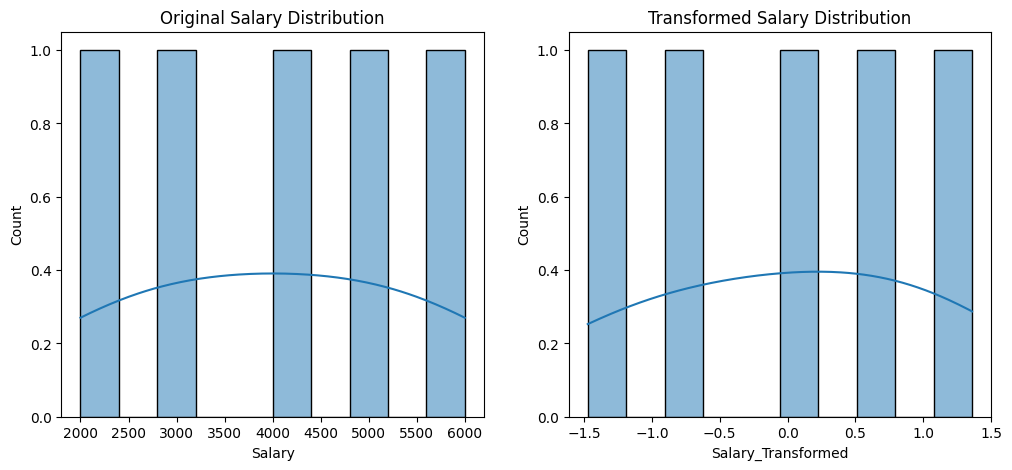

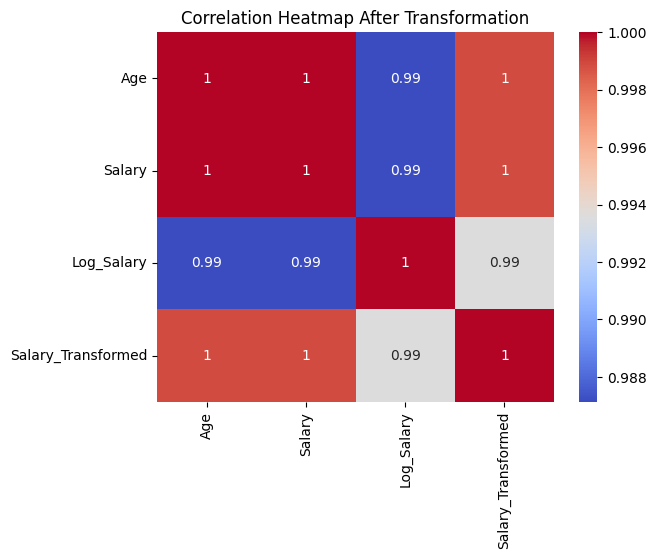

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram before & after transformation
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data['Salary'], bins=10, ax=ax[0], kde=True)
ax[0].set_title("Original Salary Distribution")

sns.histplot(data['Salary_Transformed'], bins=10, ax=ax[1], kde=True)
ax[1].set_title("Transformed Salary Distribution")

plt.show()

# Correlation Heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap After Transformation")
plt.show()
